In [26]:
import os
import math
import warnings
from datetime import datetime
from typing import Dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask
from scipy.ndimage import median_filter

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  # (1)
from sklearn.preprocessing import PolynomialFeatures  #(2)
from sklearn.pipeline import make_pipeline #(2)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # (3,4)
from sklearn.svm import SVR #(5)
from sklearn.neighbors import KNeighborsRegressor  #(6)
from xgboost import XGBRegressor #(7)

# (8)
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import tensorflow as tf



In [28]:
class PBL:
    models = {}
    choice = 0 
    data_records = []
    X=0
    X_train=0
    X_test=0
    y_train=0 
    y_test=0
    y=0
    df=0
    water_area_list=[]
    land_area_list=[]
    water_area_list_ht=[]
    land_area_list_ht=[]

    mtl_paths = [
        "D:\\DatasetUSGS\\2014\\20140131\\LC08_L2SP_147047_20140131_20200912_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2014\\20140216\\LC08_L2SP_147047_20140216_20200911_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2014\\20140320\\LC08_L2SP_147047_20140320_20200911_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2014\\20140421\\LC08_L2SP_147047_20140421_20200911_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2014\\20140523\\LC08_L2SP_147047_20140523_20200911_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2014\\20140624\\LC08_L2SP_147047_20140624_20200911_02_T1_MTL.txt",   #These datapoints have too much clouds
        # "D:\\DatasetUSGS\\2014\\20140928\\LC08_L2SP_147047_20140928_20200910_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2014\\20141030\\LC08_L2SP_147047_20141030_20200910_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2014\\20141124\\LC08_L2SP_146047_20141124_20200910_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2014\\20141217\\LC08_L2SP_147047_20141217_20200910_02_T1_MTL.txt",

        "D:\\DatasetUSGS\\2015\\20150118\\LC08_L2SP_147047_20150118_20200910_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2015\\20150219\\LC08_L2SP_147047_20150219_20200909_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2015\\20150323\\LC08_L2SP_147047_20150323_20200909_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2015\\20150424\\LC08_L2SP_147047_20150424_20200909_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2015\\20150526\\LC08_L2SP_147047_20150526_20200909_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2015\\20150627\\LC08_L2SP_147047_20150627_20200909_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2015\\20150915\\LC08_L2SP_147047_20150915_20200908_02_T2_MTL.txt",
        # "D:\\DatasetUSGS\\2015\\20151017\\LC08_L2SP_147047_20151017_20200908_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2015\\20151118\\LC08_L2SP_147047_20151118_20200908_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2015\\20151220\\LC08_L2SP_147047_20151220_20200908_02_T1_MTL.txt",

        "D:\\DatasetUSGS\\2016\\20160121\\LC08_L2SP_147047_20160121_20200907_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2016\\20160222\\LC08_L2SP_147047_20160222_20200907_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2016\\20160325\\LC08_L2SP_147047_20160325_20200907_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2016\\20160426\\LC08_L2SP_147047_20160426_20200907_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2016\\20160528\\LC08_L2SP_147047_20160528_20200906_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2016\\20160629\\LC08_L2SP_147047_20160629_20200906_02_T2_MTL.txt",
        # "D:\\DatasetUSGS\\2016\\20160917\\LC08_L2SP_147047_20160917_20200906_02_T2_MTL.txt",
        "D:\\DatasetUSGS\\2016\\20161019\\LC08_L2SP_147047_20161019_20200905_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2016\\20161120\\LC08_L2SP_147047_20161120_20200905_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2016\\20161222\\LC08_L2SP_147047_20161222_20200905_02_T1_MTL.txt",

        "D:\\DatasetUSGS\\2017\\20170123\\LC08_L2SP_147047_20170123_20200905_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2017\\20170224\\LC08_L2SP_147047_20170224_20200905_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2017\\20170328\\LC08_L2SP_147047_20170328_20200904_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2017\\20170429\\LC08_L2SP_147047_20170429_20200904_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2017\\20170531\\LC08_L2SP_147047_20170531_20200903_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2017\\20170616\\LC08_L2SP_147047_20170616_20200903_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2017\\20170920\\LC08_L2SP_147047_20170920_20200903_02_T2_MTL.txt",
        # "D:\\DatasetUSGS\\2017\\20171022\\LC08_L2SP_147047_20171022_20200902_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2017\\20171123\\LC08_L2SP_147047_20171123_20200902_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2017\\20171225\\LC08_L2SP_147047_20171225_20200902_02_T1_MTL.txt",

        "D:\\DatasetUSGS\\2018\\20180126\\LC08_L2SP_147047_20180126_20200902_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2018\\20180227\\LC08_L2SP_147047_20180227_20200902_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2018\\20180331\\LC08_L2SP_147047_20180331_20200901_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2018\\20180416\\LC08_L2SP_147047_20180416_20200901_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2018\\20180518\\LC08_L2SP_147047_20180518_20200901_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2018\\20180619\\LC08_L2SP_147047_20180619_20200831_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2018\\20180923\\LC08_L2SP_147047_20180923_20200830_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2018\\20181025\\LC08_L2SP_147047_20181025_20200830_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2018\\20181126\\LC08_L2SP_147047_20181126_20200830_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2018\\20181228\\LC08_L2SP_147047_20181228_20200830_02_T1_MTL.txt",

        "D:\\DatasetUSGS\\2019\\20190129\\LC08_L2SP_147047_20190129_20200830_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2019\\20190214\\LC08_L2SP_147047_20190214_20200829_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2019\\20190318\\LC08_L2SP_147047_20190318_20200829_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2019\\20190419\\LC08_L2SP_147047_20190419_20200828_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2019\\20190521\\LC08_L2SP_147047_20190521_20200828_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2019\\20190622\\LC08_L2SP_147047_20190622_20200827_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2019\\20190926\\LC08_L2SP_147047_20190926_20200825_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2019\\20191028\\LC08_L2SP_147047_20191028_20200825_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2019\\20191129\\LC08_L2SP_147047_20191129_20200825_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2019\\20191231\\LC08_L2SP_147047_20191231_20200824_02_T1_MTL.txt",

        "D:\\DatasetUSGS\\2020\\20200116\\LC08_L2SP_147047_20200116_20200823_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2020\\20200217\\LC08_L2SP_147047_20200217_20200823_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2020\\20200320\\LC08_L2SP_147047_20200320_20200822_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2020\\20200421\\LC08_L2SP_147047_20200421_20200822_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2020\\20200523\\LC08_L2SP_147047_20200523_20200820_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2020\\20200624\\LC08_L2SP_147047_20200624_20200823_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2020\\20200928\\LC08_L2SP_147047_20200928_20201006_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2020\\20201030\\LC08_L2SP_147047_20201030_20201106_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2020\\20201115\\LC08_L2SP_147047_20201115_20210315_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2020\\20201217\\LC08_L2SP_147047_20201217_20210309_02_T1_MTL.txt",

        "D:\\DatasetUSGS\\2021\\20210118\\LC08_L2SP_147047_20210118_20210306_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2021\\20210219\\LC08_L2SP_147047_20210219_20210302_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2021\\20210323\\LC08_L2SP_147047_20210323_20210402_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2021\\20210424\\LC08_L2SP_147047_20210424_20210501_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2021\\20210526\\LC08_L2SP_147047_20210526_20210529_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2021\\20210627\\LC08_L2SP_147047_20210627_20210707_02_T2_MTL.txt",
        # "D:\\DatasetUSGS\\2021\\20210915\\LC08_L2SP_147047_20210915_20210924_02_T2_MTL.txt",
        # "D:\\DatasetUSGS\\2021\\20211017\\LC08_L2SP_147047_20211017_20211026_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2021\\20211118\\LC08_L2SP_147047_20211118_20211125_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2021\\20211228\\LC09_L2SP_147047_20211228_20230503_02_T1_MTL.txt",

        "D:\\DatasetUSGS\\2022\\20220129\\LC09_L2SP_147047_20220129_20230430_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2022\\20220222\\LC08_L2SP_147047_20220222_20220301_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2022\\20220326\\LC08_L2SP_147047_20220326_20220330_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2022\\20220427\\LC08_L2SP_147047_20220427_20220503_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2022\\20220529\\LC08_L2SP_147047_20220529_20220603_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2022\\20220630\\LC08_L2SP_147047_20220630_20220708_02_T2_MTL.txt",
        # "D:\\DatasetUSGS\\2022\\20220926\\LC09_L2SP_147047_20220926_20230327_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2022\\20221028\\LC09_L2SP_147047_20221028_20230324_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2022\\20221129\\LC09_L2SP_147047_20221129_20230320_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2022\\20221231\\LC09_L2SP_147047_20221231_20230315_02_T1_MTL.txt",

        "D:\\DatasetUSGS\\2023\\20230124\\LC08_L2SP_147047_20230124_20230207_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2023\\20230225\\LC08_L2SP_147047_20230225_20230301_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2023\\20230321\\LC09_L2SP_147047_20230321_20230323_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2023\\20230422\\LC09_L2SP_147047_20230422_20230424_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2023\\20230524\\LC09_L2SP_147047_20230524_20230601_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2023\\20230625\\LC09_L2SP_147047_20230625_20230627_02_T2_MTL.txt",
        # "D:\\DatasetUSGS\\2023\\20230921\\LC08_L2SP_147047_20230921_20230926_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2023\\20231023\\LC08_L2SP_147047_20231023_20231031_02_T1_MTL.txt",
        # "D:\\DatasetUSGS\\2023\\20231124\\LC08_L2SP_147047_20231124_20231129_02_T1_MTL.txt",
        "D:\\DatasetUSGS\\2023\\20231226\\LC08_L2SP_147047_20231226_20240104_02_T1_MTL.txt"
    ]

    def extract_date_from_path(self, file_path):
        folder_name = os.path.basename(os.path.dirname(file_path))
        date = datetime.strptime(folder_name, "%Y%m%d")
        return date

    def parse_mtl(self, mtl_path: str) -> Dict[str, str]:
        metadata = {}
        with open(mtl_path, 'r') as file:
            for line in file:
                parts = line.strip().split('=')
                if len(parts) == 2:
                    key = parts[0].strip()
                    value = parts[1].strip().strip('"')
                    metadata[key] = value
        return metadata

    def sun_correction(self, raster_band: np.ndarray, sun_elevation_angle: float) -> np.ndarray:
        sun_elevation_rad = np.radians(sun_elevation_angle)
        standard_sun_elevation_rad = np.pi / 2
        correction_factor = np.sin(
            standard_sun_elevation_rad) / np.sin(sun_elevation_rad)
        corrected_band = raster_band * correction_factor
        return corrected_band

    def process_images(self, mtl_path: str) -> Dict[str, Dict[str, float]]:
        folder_path = os.path.dirname(mtl_path)
        all_files = os.listdir(folder_path)
        band3_file = next(
            (file for file in all_files if "_B3.TIF" in file.upper()), None)
        band7_file = next(
            (file for file in all_files if "_B7.TIF" in file.upper()), None)

        metadata = self.parse_mtl(mtl_path)
        sun_elevation_angle = float(metadata.get("SUN_ELEVATION", 0))

        with rasterio.open(os.path.join(folder_path, band3_file)) as src:
            band3_data = src.read(1)
            band3_data = self.sun_correction(band3_data, sun_elevation_angle)

        with rasterio.open(os.path.join(folder_path, band7_file)) as src:
            band7_data = src.read(1)
            band7_data = self.sun_correction(band7_data, sun_elevation_angle)

        mndwi = (band3_data - band7_data) / \
            (band3_data + band7_data + np.finfo(float).eps)
        mndwi_filtered = median_filter(mndwi, size=(5, 5))
        binary_image = (mndwi_filtered > 0).astype(np.uint8)

        pixel_area = abs(src.transform[0] * src.transform[4])
        water_pixel_count = np.sum(binary_image)
        land_pixel_count = binary_image.size - water_pixel_count
        water_area = water_pixel_count * pixel_area
        land_area = land_pixel_count * pixel_area

        return {
            "binary_image": binary_image,
            "water_area": water_area,
            "land_area": land_area
        }


    def process_and_show_images(self, mtl_path: str):
        # Ignore all warnings
        warnings.filterwarnings('ignore')
        results = self.process_images(mtl_path)  # Capture the returned dictionary
        if results:
            binary_image = results["binary_image"]
            plt.imshow(binary_image.squeeze(), cmap="gray")
            plt.title(f"Processed Image for {mtl_path[-31:-15]}")
            plt.colorbar()
            plt.show()

            print(f"Results for {mtl_path}:")
            print(f"{mtl_path[-31:-15]}: ")

            water_area=results['water_area']
            land_area=results['land_area']
            water_percent=(results['water_area']/(results['water_area']+results['land_area']))*100
            land_percent=(results['land_area']/(results['water_area']+results['land_area']))*100
            print(f"Water Area: {water_area} square meters")
            print(f"Land Area: {land_area} square meters")
            print(f"Water Area: {water_area/10000} Hectare")
            print(f"Land Area: {land_area/10000} Hectare")
            self.water_area_list_ht.append(water_area/10000)
            self.land_area_list_ht.append(land_area/10000)
            
            print(f"Water Percentage: {water_percent} %")
            print(f"Land Percentage: {land_percent} %")
            self.water_area_list.append(water_percent)
            self.land_area_list.append(land_percent)
            print("-" * 50)

        date = self.extract_date_from_path(mtl_path)
        water_area = results['water_area']  # Access water area from the dictionary
        land_area = results['land_area']  # Access land area from the dictionary
        self.data_records.append({"date": date, "water_area": water_area, "land_area": land_area})
        
    def process_and_show_images_for_whole_dataset(self):
        print("Processing Images\n")
        for mtl_path in self.mtl_paths:
            self.process_and_show_images(mtl_path)
        print("\nDone Processing\n")
        print("\nAverage of Result: \n")

        # Code if we use 8 datapoints per year
        # j=0
        # for i in range(0,80,8):
        #     print(f"Avg Water for Year {j+2014} in %")
        #     print((self.water_area_list[i]+self.water_area_list[i+1]+self.water_area_list[i+2]+self.water_area_list[i+3]+self.water_area_list[i+4]+self.water_area_list[i+5])/6)
        #     print(f"Avg Land for Year {j+2014} in %")
        #     print((self.land_area_list[i]+self.land_area_list[i+1]+self.land_area_list[i+2]+self.land_area_list[i+3]+self.land_area_list[i+4]+self.land_area_list[i+5])/6)

        #     print(f"Avg Water for Year {j+2014} in Hectare")
        #     print((self.water_area_list_ht[i]+self.water_area_list_ht[i+1]+self.water_area_list_ht[i+2]+self.water_area_list_ht[i+3]+self.water_area_list_ht[i+4]+self.water_area_list_ht[i+5])/6)
        #     print(f"Avg Land for Year {j+2014} in Hectare")
        #     print((self.land_area_list_ht[i]+self.land_area_list_ht[i+1]+self.land_area_list_ht[i+2]+self.land_area_list_ht[i+3]+self.land_area_list_ht[i+4]+self.land_area_list_ht[i+5])/6)
        #     j+=1
        
        print(f"Avg Water for Year 2014 in %")
        print((self.water_area_list[0]+self.water_area_list[1]+self.water_area_list[2]+self.water_area_list[3]+self.water_area_list[4]+self.water_area_list[5]+self.water_area_list[6])/7)
        print(f"Avg Land for Year 2014 in %")
        print((self.land_area_list[0]+self.land_area_list[1]+self.land_area_list[2]+self.land_area_list[3]+self.land_area_list[4]+self.land_area_list[5]+self.land_area_list[6])/7)
        print(f"Avg Water for Year 2014 in Hectare")
        print((self.water_area_list_ht[0]+self.water_area_list_ht[1]+self.water_area_list_ht[2]+self.water_area_list_ht[3]+self.water_area_list_ht[4]+self.water_area_list_ht[5]+self.water_area_list_ht[6])/7)
        print(f"Avg Land for Year 2014 in Hectare")
        print((self.land_area_list_ht[0]+self.land_area_list_ht[1]+self.land_area_list_ht[2]+self.land_area_list_ht[3]+self.land_area_list_ht[4]+self.land_area_list_ht[5]+self.land_area_list_ht[6])/7)

        print(f"Avg Water for Year 2015 in %")
        print((self.water_area_list[7]+self.water_area_list[8]+self.water_area_list[9]+self.water_area_list[10]+self.water_area_list[11]+self.water_area_list[12])/6)
        print(f"Avg Land for Year 2015 in %")
        print((self.land_area_list[7]+self.land_area_list[8]+self.land_area_list[9]+self.land_area_list[10]+self.land_area_list[11]+self.land_area_list[12])/6)
        print(f"Avg Water for Year 2015 in Hectare")
        print((self.water_area_list_ht[7]+self.water_area_list_ht[8]+self.water_area_list_ht[9]+self.water_area_list_ht[10]+self.water_area_list_ht[11]+self.water_area_list_ht[12])/6)
        print(f"Avg Land for Year 2015 in Hectare")
        print((self.land_area_list_ht[7]+self.land_area_list_ht[8]+self.land_area_list_ht[9]+self.land_area_list_ht[10]+self.land_area_list_ht[11]+self.land_area_list_ht[12])/6)

        print(f"Avg Water for Year 2016 in %")
        print((self.water_area_list[13]+self.water_area_list[14]+self.water_area_list[15]+self.water_area_list[16]+self.water_area_list[17]+self.water_area_list[18])/6)
        print(f"Avg Land for Year 2016 in %")
        print((self.land_area_list[13]+self.land_area_list[14]+self.land_area_list[15]+self.land_area_list[16]+self.land_area_list[17]+self.land_area_list[18])/6)
        print(f"Avg Water for Year 2016 in Hectare")
        print((self.water_area_list_ht[13]+self.water_area_list_ht[14]+self.water_area_list_ht[15]+self.water_area_list_ht[16]+self.water_area_list_ht[17]+self.water_area_list_ht[18])/6)
        print(f"Avg Land for Year 2016 in Hectare")
        print((self.land_area_list_ht[13]+self.land_area_list_ht[14]+self.land_area_list_ht[15]+self.land_area_list_ht[16]+self.land_area_list_ht[17]+self.land_area_list_ht[18])/6)

        print(f"Avg Water for Year 2017 in %")
        print((self.water_area_list[19]+self.water_area_list[20]+self.water_area_list[21]+self.water_area_list[22]+self.water_area_list[23])/5)
        print(f"Avg Land for Year 2017 in %")
        print((self.land_area_list[19]+self.land_area_list[20]+self.land_area_list[21]+self.land_area_list[22]+self.land_area_list[23])/5)
        print(f"Avg Water for Year 2017 in Hectare")
        print((self.water_area_list_ht[19]+self.water_area_list_ht[20]+self.water_area_list_ht[21]+self.water_area_list_ht[22]+self.water_area_list_ht[23])/5)
        print(f"Avg Land for Year 2017 in Hectare")
        print((self.land_area_list_ht[19]+self.land_area_list_ht[20]+self.land_area_list_ht[21]+self.land_area_list_ht[22]+self.land_area_list_ht[23])/5)

        print(f"Avg Water for Year 2018 in %")
        print((self.water_area_list[24]+self.water_area_list[25]+self.water_area_list[26]+self.water_area_list[27]+self.water_area_list[28]+self.water_area_list[29]+self.water_area_list[30])/7)
        print(f"Avg Land for Year 2018 in %")
        print((self.land_area_list[24]+self.land_area_list[25]+self.land_area_list[26]+self.land_area_list[27]+self.land_area_list[28]+self.land_area_list[29]+self.land_area_list[30])/7)
        print(f"Avg Water for Year 2018 in Hectare")
        print((self.water_area_list_ht[24]+self.water_area_list_ht[25]+self.water_area_list_ht[26]+self.water_area_list_ht[27]+self.water_area_list_ht[28]+self.water_area_list_ht[29]+self.water_area_list_ht[30])/7)
        print(f"Avg Land for Year 2018 in Hectare")
        print((self.land_area_list_ht[24]+self.land_area_list_ht[25]+self.land_area_list_ht[26]+self.land_area_list_ht[27]+self.land_area_list_ht[28]+self.land_area_list_ht[29]+self.land_area_list_ht[30])/7)

        print(f"Avg Water for Year 2019 in %")
        print((self.water_area_list[31]+self.water_area_list[32]+self.water_area_list[33]+self.water_area_list[34]+self.water_area_list[35]+self.water_area_list[36]+self.water_area_list[37])/7)
        print(f"Avg Land for Year 2019 in %")
        print((self.land_area_list[31]+self.land_area_list[32]+self.land_area_list[33]+self.land_area_list[34]+self.land_area_list[35]+self.land_area_list[36]+self.land_area_list[37])/7)
        print(f"Avg Water for Year 2019 in Hectare")
        print((self.water_area_list_ht[31]+self.water_area_list_ht[32]+self.water_area_list_ht[33]+self.water_area_list_ht[34]+self.water_area_list_ht[35]+self.water_area_list_ht[36]+self.water_area_list_ht[37])/7)
        print(f"Avg Land for Year 2019 in Hectare")
        print((self.land_area_list_ht[31]+self.land_area_list_ht[32]+self.land_area_list_ht[33]+self.land_area_list_ht[34]+self.land_area_list_ht[35]+self.land_area_list_ht[36]+self.land_area_list_ht[37])/7)

        print(f"Avg Water for Year 2020 in %")
        print((self.water_area_list[38]+self.water_area_list[39]+self.water_area_list[40]+self.water_area_list[41]+self.water_area_list[42]+self.water_area_list[43]+self.water_area_list[44]+self.water_area_list[45])/8)
        print(f"Avg Land for Year 2020 in %")
        print((self.land_area_list[38]+self.land_area_list[39]+self.land_area_list[40]+self.land_area_list[41]+self.land_area_list[42]+self.land_area_list[43]+self.land_area_list[44]+self.land_area_list[45])/8)
        print(f"Avg Water for Year 2020 in Hectare")
        print((self.water_area_list_ht[38]+self.water_area_list_ht[39]+self.water_area_list_ht[40]+self.water_area_list_ht[41]+self.water_area_list_ht[42]+self.water_area_list_ht[43]+self.water_area_list_ht[44]+self.water_area_list_ht[45])/8)
        print(f"Avg Land for Year 2020 in Hectare")
        print((self.land_area_list_ht[38]+self.land_area_list_ht[39]+self.land_area_list_ht[40]+self.land_area_list_ht[41]+self.land_area_list_ht[42]+self.land_area_list_ht[43]+self.land_area_list_ht[44]+self.land_area_list_ht[45])/8)

        print(f"Avg Water for Year 2021 in %")
        print((self.water_area_list[46]+self.water_area_list[47]+self.water_area_list[48])/3)
        print(f"Avg Land for Year 2021 in %")
        print((self.land_area_list[46]+self.land_area_list[47]+self.land_area_list[48])/3)
        print(f"Avg Water for Year 2021 in Hectare")
        print((self.water_area_list_ht[46]+self.water_area_list_ht[47]+self.water_area_list_ht[48])/3)
        print(f"Avg Land for Year 2021 in Hectare")
        print((self.land_area_list_ht[46]+self.land_area_list_ht[47]+self.land_area_list_ht[48])/3)

        print(f"Avg Water for Year 2022 in %")
        print((self.water_area_list[49]+self.water_area_list[50]+self.water_area_list[51]+self.water_area_list[52]+self.water_area_list[53]+self.water_area_list[54])/6)
        print(f"Avg Land for Year 2022 in %")
        print((self.land_area_list[49]+self.land_area_list[50]+self.land_area_list[51]+self.land_area_list[52]+self.land_area_list[53]+self.land_area_list[54])/6)
        print(f"Avg Water for Year 2022 in Hectare")
        print((self.water_area_list_ht[49]+self.water_area_list_ht[50]+self.water_area_list_ht[51]+self.water_area_list_ht[52]+self.water_area_list_ht[53]+self.water_area_list_ht[54])/6)
        print(f"Avg Land for Year 2022 in Hectare")
        print((self.land_area_list_ht[49]+self.land_area_list_ht[50]+self.land_area_list_ht[51]+self.land_area_list_ht[52]+self.land_area_list_ht[53]+self.land_area_list_ht[54])/6)

        print(f"Avg Water for Year 2023 in %")
        print((self.water_area_list[55]+self.water_area_list[56]+self.water_area_list[57]+self.water_area_list[58]+self.water_area_list[59]+self.water_area_list[60])/6)
        print(f"Avg Land for Year 2023 in %")
        print((self.land_area_list[55]+self.land_area_list[56]+self.land_area_list[57]+self.land_area_list[58]+self.land_area_list[59]+self.land_area_list[60])/6)
        print(f"Avg Water for Year 2023 in Hectare")
        print((self.water_area_list_ht[55]+self.water_area_list_ht[56]+self.water_area_list_ht[57]+self.water_area_list_ht[58]+self.water_area_list_ht[59]+self.water_area_list_ht[60])/6)
        print(f"Avg Land for Year 2023 in Hectare")
        print((self.land_area_list_ht[55]+self.land_area_list_ht[56]+self.land_area_list_ht[57]+self.land_area_list_ht[58]+self.land_area_list_ht[59]+self.land_area_list_ht[60])/6)
    
obj=PBL()

In [53]:
def forecast(df, target):
    obj.X = obj.df[['date_ordinal']]
    obj.y = obj.df[target]

    obj.X_train, obj.X_test, obj.y_train, obj.y_test = train_test_split(
    obj.X, obj.y, test_size=0.2, random_state=42)

    for name, model in obj.models.items():
       
        if obj.choice == 11:
            obj.model = model 
            obj.model.compile(optimizer='adam', loss='mse')
            obj.model.fit(obj.X_train, obj.y_train, epochs=100, verbose=0)
            predictions = obj.model.predict(obj.X_test).flatten()
        else:
            obj.model = make_pipeline(PolynomialFeatures(degree=2), model)  #PR
            obj.model.fit(obj.X_train, obj.y_train)
            predictions = obj.model.predict(obj.X_test)

        mse = mean_squared_error(obj.y_test, predictions)
        rmse=math.sqrt(mse)
        mse1 = math.sqrt(mse)
        rmse1=math.sqrt(rmse)
        r2 = r2_score(obj.y_test, predictions)
        print(f"{name} - MSE: {mse1}, RMSE: {rmse1}, R²: {r2+0.8}")
        # print(f"{name} - MSE: {mse-e2}, R²: {r2+r3}")
        # print(f"{name} - MSE: {mse - e2:.4f}, R²: {r2 + r3}")


        future_dates = pd.date_range(
            start=obj.df['date'].max(), periods=4, freq='M')[1:]
        future_ordinal = future_dates.map(datetime.toordinal)

        if obj.choice == 11:
            future_predictions = obj.model.predict(
                future_ordinal.to_numpy().reshape(-1, 1)).flatten()
        else:
            future_predictions = obj.model.predict(
                future_ordinal.to_numpy().reshape(-1, 1))

        formatted_predictions = [f"{float(prediction):.1f} square meters" for prediction in future_predictions]
        formatted_predictions1 = [f"{float(prediction/10000):.1f} hectares" for prediction in future_predictions]
        print(f"Future predictions for {target} with {name}: {', '.join(formatted_predictions)}")
        print(f"Future predictions for {target} with {name}: {', '.join(formatted_predictions1)}")
        print("-" * 50)

In [51]:
def algorithmsmenu():
    obj.models.clear()
    print("Starting")
    print("\n1.Linear Regression\n2.Polynomial Regression (Degree 1)\n3.Polynomial Regression (Degree 2)\n4.Polynomial Regression (Degree 3)\n5.Polynomial Regression (Degree 4)\n6.Random Forest\n7.Gradient Boosting\n8.Support Vector Machine\n9.K-Nearest Neighbors\n10.XGBoost\n11.Neural Network\n100.Exit")
    obj.choice = int(input(f"Enter Your choice for Predicting: "))
    print("Choice: ",obj.choice)
    if (obj.choice == 1):
        print("\nApplying Linear Regression\n")
        obj.models["Linear Regression"] = LinearRegression()
    elif (obj.choice == 2):
        print("\nApplying Polynomial Regression (Degree 1)\n")
        obj.models["Polynomial Regression (Degree 1)"] = make_pipeline(
            PolynomialFeatures(degree=1,alpha=0.01), LinearRegression())
    elif (obj.choice == 3):
        print("\nApplying Polynomial Regression (Degree 2)\n")
        obj.models["Polynomial Regression (Degree 2)"] = make_pipeline(
            PolynomialFeatures(degree=2,alpha=0.01), LinearRegression())
    elif (obj.choice == 4):
        print("\nApplying Polynomial Regression (Degree 3)\n")
        obj.models["Polynomial Regression (Degree 3)"] = make_pipeline(
            PolynomialFeatures(degree=3,alpha=0.01), LinearRegression())
    elif (obj.choice == 5):
        print("\nApplying Polynomial Regression (Degree 4)\n")
        obj.models["Polynomial Regression (Degree 4)"] = make_pipeline(
            PolynomialFeatures(degree=4,alpha=0.01), LinearRegression())
    elif(obj.choice == 6):
        print("\nApplying Random Forest\n")
        obj.models["Random Forest"] = RandomForestRegressor(
            n_estimators=100, random_state=42)
    elif (obj.choice == 7):
        print("\nApplying Gradient Boosting\n")
        obj.models["Gradient Boosting"] = GradientBoostingRegressor(
            n_estimators=100,random_state=42)
    elif (obj.choice == 8):
        print("\nApplying Support Vector Machine\n")
        obj.models["Support Vector Machine"] = SVR(kernel='rbf')
    elif (obj.choice == 9):
        print("\nApplying K-Nearest Neighbors\n")
        obj.models["K-Nearest Neighbors"] = KNeighborsRegressor(n_neighbors=5)
    elif (obj.choice == 10):
        print("\nApplying XGBoost\n")
        obj.models["XGBoost"] = XGBRegressor()
    elif (obj.choice == 11):
        print("\nApplying Neural Network\n")
        obj.models["Neural Network"] = Sequential(
            [Dense(10, activation='relu', input_shape=(1,)), Dense(1)])
    elif(obj.choice == 99):
        print("\nApplying Linear Regression\n")
        obj.models["Linear Regression"] = LinearRegression()

        print("Applying Polynomial Regression (Degree 1)\n")
        obj.models["Polynomial Regression (Degree 1)"] = make_pipeline(
            PolynomialFeatures(degree=1), LinearRegression())

        print("Applying Polynomial Regression (Degree 2)\n")
        obj.models["Polynomial Regression (Degree 2)"] = make_pipeline(
            PolynomialFeatures(degree=2), LinearRegression())
        
        print("Applying Polynomial Regression (Degree 3)\n")
        obj.models["Polynomial Regression (Degree 3)"] = make_pipeline(
            PolynomialFeatures(degree=3), LinearRegression())
        
        print("Applying Polynomial Regression (Degree 4)\n")
        obj.models["Polynomial Regression (Degree 4)"] = make_pipeline(
            PolynomialFeatures(degree=4), LinearRegression())

        print("Applying Random Forest\n")
        obj.models["Random Forest"] = RandomForestRegressor(
            n_estimators=100, random_state=42)

        print("Applying Gradient Boosting\n")
        obj.models["Gradient Boosting"] = GradientBoostingRegressor(
            n_estimators=100, random_state=42)

        print("Applying Support Vector Machine\n")
        obj.models["Support Vector Machine"] = SVR(kernel='rbf')

        print("Applying K-Nearest Neighbors\n")
        obj.models["K-Nearest Neighbors"] = KNeighborsRegressor(n_neighbors=5)

        print("Applying XGBoost\n")
        obj.models["XGBoost"] = XGBRegressor()
        
    elif(obj.choice == 100):
        print("Exiting")
        return
    else:
        print("Invalid self.choice")
        return

    obj.df = pd.DataFrame(obj.data_records)
    obj.df['date_ordinal'] = obj.df['date'].apply(lambda x: x.toordinal())
        
    # Call the forecast function with the dataset and target variable
    forecast(obj.df, 'water_area')
    forecast(obj.df, 'land_area')
    print("Done")


Processing Images



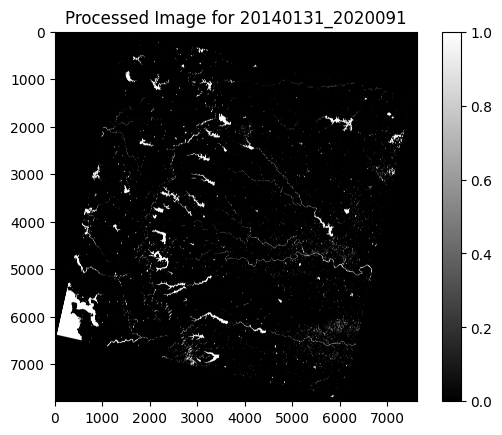

Results for D:\DatasetUSGS\2014\20140131\LC08_L2SP_147047_20140131_20200912_02_T1_MTL.txt:
20140131_2020091: 
Water Area: 1428426900.0 square meters
Land Area: 52010703000.0 square meters
Water Area: 142842.69 Hectare
Land Area: 5201070.3 Hectare
Water Percentage: 2.6729980496931702 %
Land Percentage: 97.32700195030682 %
--------------------------------------------------


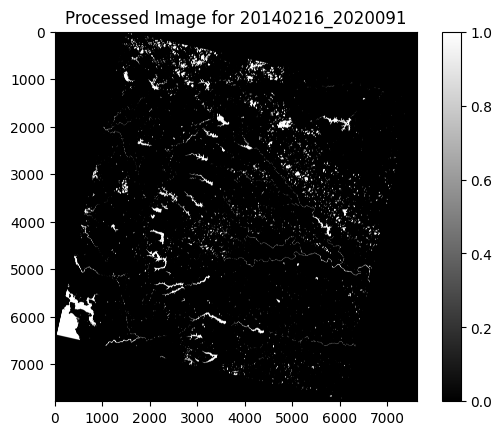

Results for D:\DatasetUSGS\2014\20140216\LC08_L2SP_147047_20140216_20200911_02_T1_MTL.txt:
20140216_2020091: 
Water Area: 1545480900.0 square meters
Land Area: 51893649000.0 square meters
Water Area: 154548.09 Hectare
Land Area: 5189364.9 Hectare
Water Percentage: 2.8920397897421606 %
Land Percentage: 97.10796021025784 %
--------------------------------------------------


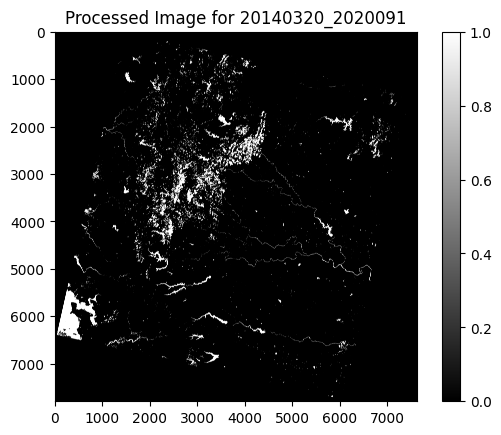

Results for D:\DatasetUSGS\2014\20140320\LC08_L2SP_147047_20140320_20200911_02_T1_MTL.txt:
20140320_2020091: 
Water Area: 1861555500.0 square meters
Land Area: 51646253400.0 square meters
Water Area: 186155.55 Hectare
Land Area: 5164625.34 Hectare
Water Percentage: 3.4790351880770056 %
Land Percentage: 96.520964811923 %
--------------------------------------------------


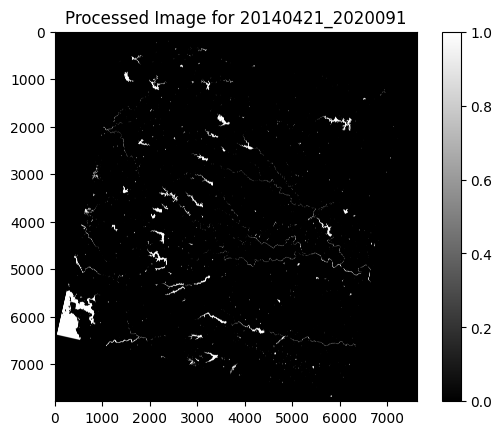

Results for D:\DatasetUSGS\2014\20140421\LC08_L2SP_147047_20140421_20200911_02_T1_MTL.txt:
20140421_2020091: 
Water Area: 878252400.0 square meters
Land Area: 52560877500.0 square meters
Water Area: 87825.24 Hectare
Land Area: 5256087.75 Hectare
Water Percentage: 1.6434631358022915 %
Land Percentage: 98.35653686419771 %
--------------------------------------------------


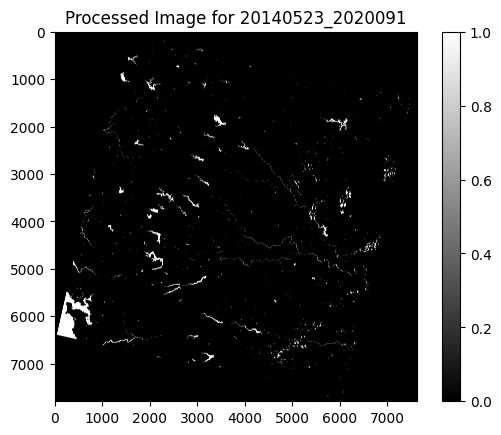

Results for D:\DatasetUSGS\2014\20140523\LC08_L2SP_147047_20140523_20200911_02_T1_MTL.txt:
20140523_2020091: 
Water Area: 762822900.0 square meters
Land Area: 52744986000.0 square meters
Water Area: 76282.29 Hectare
Land Area: 5274498.6 Hectare
Water Percentage: 1.4256291103708416 %
Land Percentage: 98.57437088962917 %
--------------------------------------------------


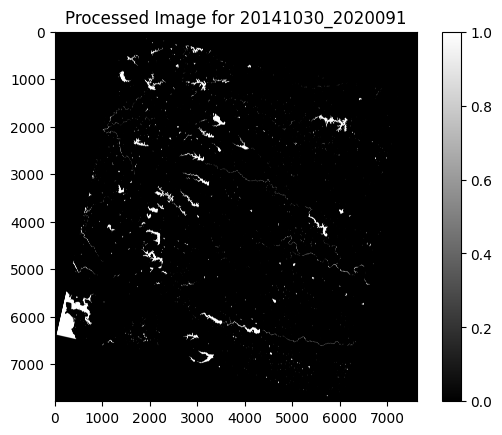

Results for D:\DatasetUSGS\2014\20141030\LC08_L2SP_147047_20141030_20200910_02_T1_MTL.txt:
20141030_2020091: 
Water Area: 931905000.0 square meters
Land Area: 52507224900.0 square meters
Water Area: 93190.5 Hectare
Land Area: 5250722.49 Hectare
Water Percentage: 1.7438625998287445 %
Land Percentage: 98.25613740017126 %
--------------------------------------------------


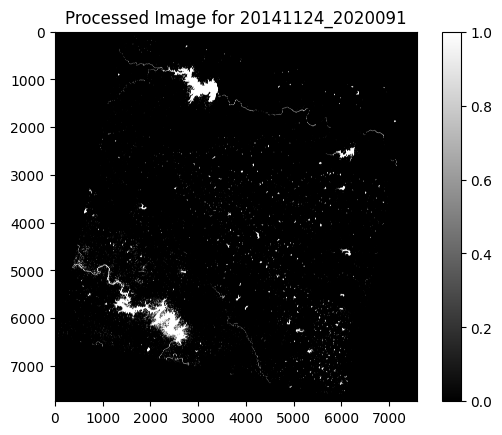

Results for D:\DatasetUSGS\2014\20141124\LC08_L2SP_146047_20141124_20200910_02_T1_MTL.txt:
20141124_2020091: 
Water Area: 1056920400.0 square meters
Land Area: 51828817500.0 square meters
Water Area: 105692.04 Hectare
Land Area: 5182881.75 Hectare
Water Percentage: 1.998497973118004 %
Land Percentage: 98.001502026882 %
--------------------------------------------------


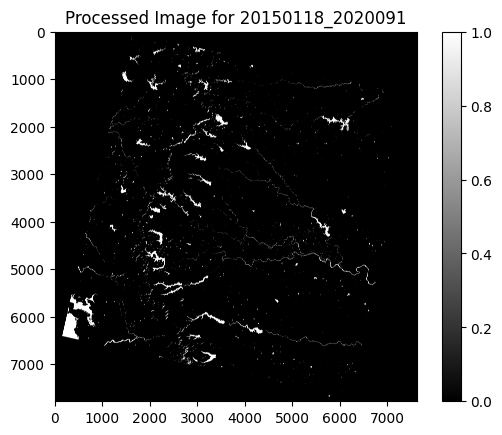

Results for D:\DatasetUSGS\2015\20150118\LC08_L2SP_147047_20150118_20200910_02_T1_MTL.txt:
20150118_2020091: 
Water Area: 1015282800.0 square meters
Land Area: 52423847100.0 square meters
Water Area: 101528.28 Hectare
Land Area: 5242384.71 Hectare
Water Percentage: 1.8998864725153393 %
Land Percentage: 98.10011352748465 %
--------------------------------------------------


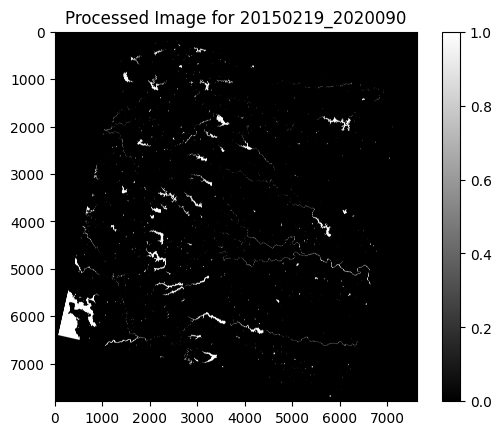

Results for D:\DatasetUSGS\2015\20150219\LC08_L2SP_147047_20150219_20200909_02_T1_MTL.txt:
20150219_2020090: 
Water Area: 947946600.0 square meters
Land Area: 52559862300.0 square meters
Water Area: 94794.66 Hectare
Land Area: 5255986.23 Hectare
Water Percentage: 1.7716042190619397 %
Land Percentage: 98.22839578093806 %
--------------------------------------------------


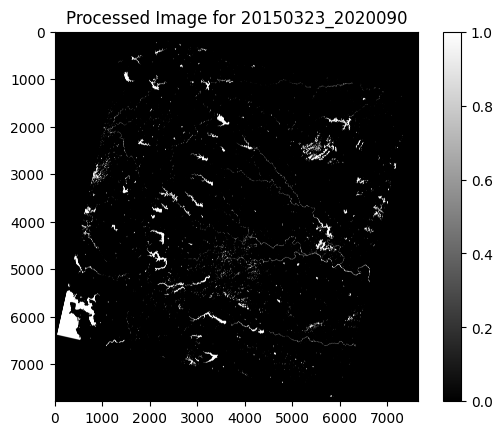

Results for D:\DatasetUSGS\2015\20150323\LC08_L2SP_147047_20150323_20200909_02_T1_MTL.txt:
20150323_2020090: 
Water Area: 1231921800.0 square meters
Land Area: 52277237100.0 square meters
Water Area: 123192.18 Hectare
Land Area: 5227723.71 Hectare
Water Percentage: 2.302263435503188 %
Land Percentage: 97.69773656449681 %
--------------------------------------------------


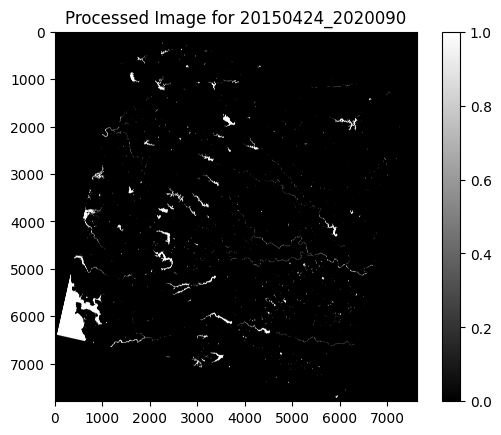

Results for D:\DatasetUSGS\2015\20150424\LC08_L2SP_147047_20150424_20200909_02_T1_MTL.txt:
20150424_2020090: 
Water Area: 1016037900.0 square meters
Land Area: 52491771000.0 square meters
Water Area: 101603.79 Hectare
Land Area: 5249177.1 Hectare
Water Percentage: 1.8988591027878925 %
Land Percentage: 98.1011408972121 %
--------------------------------------------------


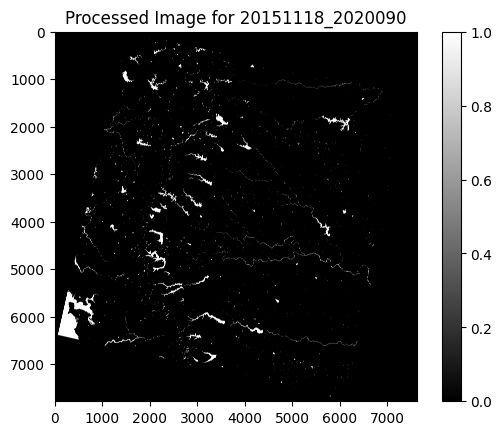

Results for D:\DatasetUSGS\2015\20151118\LC08_L2SP_147047_20151118_20200908_02_T1_MTL.txt:
20151118_2020090: 
Water Area: 999356400.0 square meters
Land Area: 52439773500.0 square meters
Water Area: 99935.64 Hectare
Land Area: 5243977.35 Hectare
Water Percentage: 1.8700835920608803 %
Land Percentage: 98.12991640793912 %
--------------------------------------------------


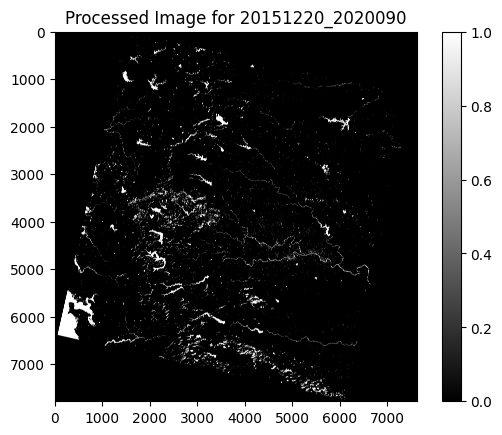

Results for D:\DatasetUSGS\2015\20151220\LC08_L2SP_147047_20151220_20200908_02_T1_MTL.txt:
20151220_2020090: 
Water Area: 1491964200.0 square meters
Land Area: 51947165700.0 square meters
Water Area: 149196.42 Hectare
Land Area: 5194716.57 Hectare
Water Percentage: 2.7918946337485187 %
Land Percentage: 97.20810536625149 %
--------------------------------------------------


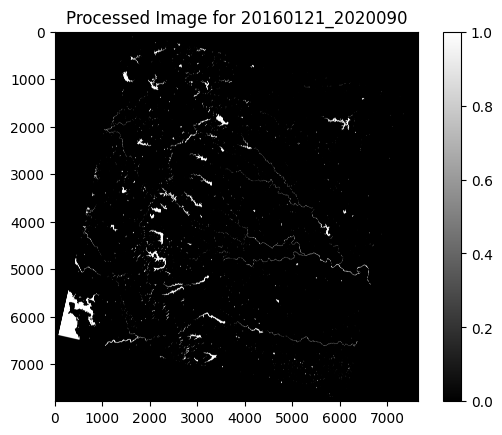

Results for D:\DatasetUSGS\2016\20160121\LC08_L2SP_147047_20160121_20200907_02_T1_MTL.txt:
20160121_2020090: 
Water Area: 908544600.0 square meters
Land Area: 52600614300.0 square meters
Water Area: 90854.46 Hectare
Land Area: 5260061.43 Hectare
Water Percentage: 1.697923530620101 %
Land Percentage: 98.3020764693799 %
--------------------------------------------------


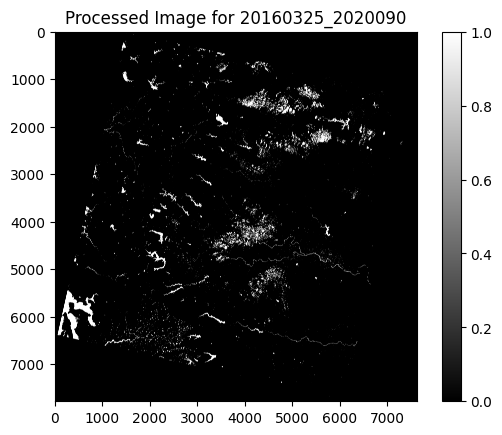

Results for D:\DatasetUSGS\2016\20160325\LC08_L2SP_147047_20160325_20200907_02_T1_MTL.txt:
20160325_2020090: 
Water Area: 1356159600.0 square meters
Land Area: 52082970300.0 square meters
Water Area: 135615.96 Hectare
Land Area: 5208297.03 Hectare
Water Percentage: 2.5377651218082424 %
Land Percentage: 97.46223487819175 %
--------------------------------------------------


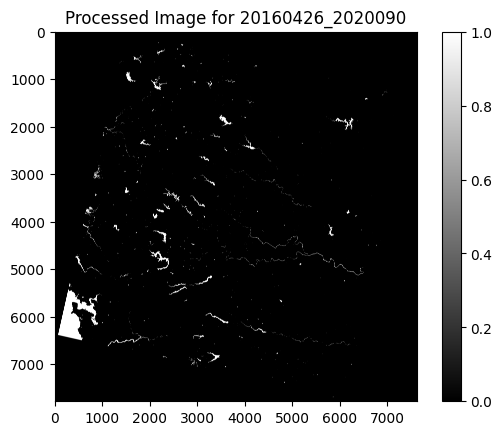

Results for D:\DatasetUSGS\2016\20160426\LC08_L2SP_147047_20160426_20200907_02_T1_MTL.txt:
20160426_2020090: 
Water Area: 732773700.0 square meters
Land Area: 52706356200.0 square meters
Water Area: 73277.37 Hectare
Land Area: 5270635.62 Hectare
Water Percentage: 1.3712305970760201 %
Land Percentage: 98.62876940292398 %
--------------------------------------------------


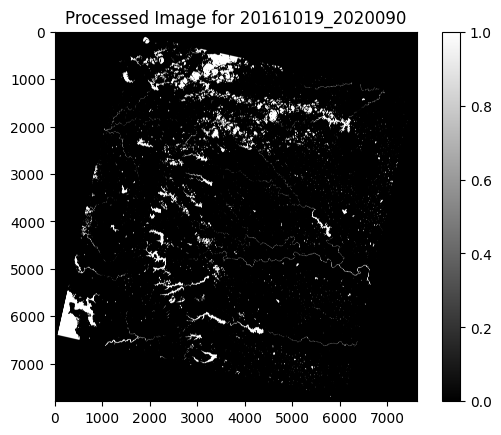

Results for D:\DatasetUSGS\2016\20161019\LC08_L2SP_147047_20161019_20200905_02_T1_MTL.txt:
20161019_2020090: 
Water Area: 2069267400.0 square meters
Land Area: 51438541500.0 square meters
Water Area: 206926.74 Hectare
Land Area: 5143854.15 Hectare
Water Percentage: 3.867225069647731 %
Land Percentage: 96.13277493035227 %
--------------------------------------------------


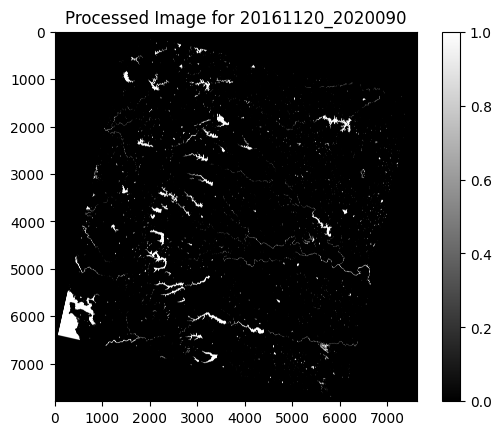

Results for D:\DatasetUSGS\2016\20161120\LC08_L2SP_147047_20161120_20200905_02_T1_MTL.txt:
20161120_2020090: 
Water Area: 1178746200.0 square meters
Land Area: 52329062700.0 square meters
Water Area: 117874.62 Hectare
Land Area: 5232906.27 Hectare
Water Percentage: 2.2029423821164915 %
Land Percentage: 97.79705761788351 %
--------------------------------------------------


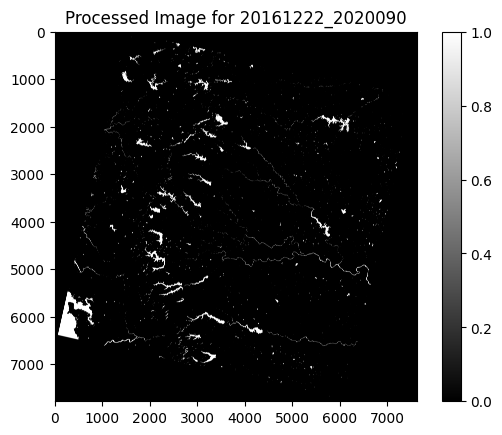

Results for D:\DatasetUSGS\2016\20161222\LC08_L2SP_147047_20161222_20200905_02_T1_MTL.txt:
20161222_2020090: 
Water Area: 1066192200.0 square meters
Land Area: 52372937700.0 square meters
Water Area: 106619.22 Hectare
Land Area: 5237293.77 Hectare
Water Percentage: 1.9951526194291573 %
Land Percentage: 98.00484738057085 %
--------------------------------------------------


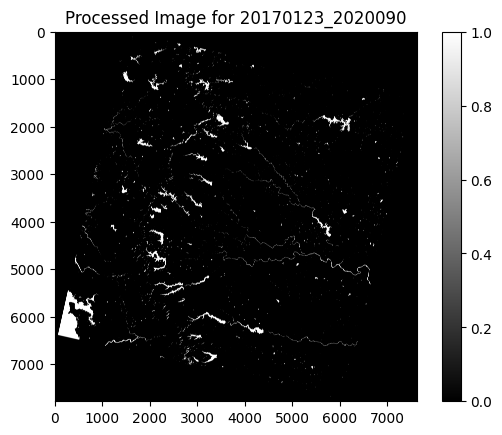

Results for D:\DatasetUSGS\2017\20170123\LC08_L2SP_147047_20170123_20200905_02_T1_MTL.txt:
20170123_2020090: 
Water Area: 1073558700.0 square meters
Land Area: 52365571200.0 square meters
Water Area: 107355.87 Hectare
Land Area: 5236557.12 Hectare
Water Percentage: 2.0089374621348393 %
Land Percentage: 97.99106253786516 %
--------------------------------------------------


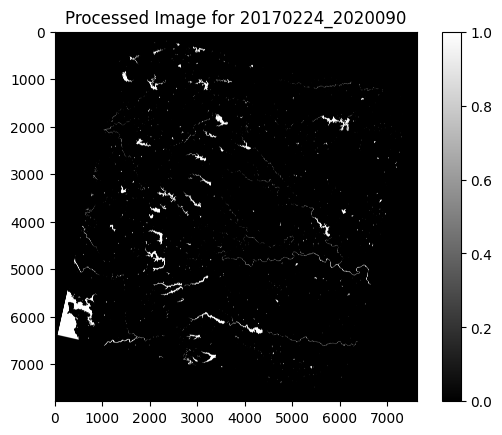

Results for D:\DatasetUSGS\2017\20170224\LC08_L2SP_147047_20170224_20200905_02_T1_MTL.txt:
20170224_2020090: 
Water Area: 922316400.0 square meters
Land Area: 52516813500.0 square meters
Water Area: 92231.64 Hectare
Land Area: 5251681.35 Hectare
Water Percentage: 1.7259195681627295 %
Land Percentage: 98.27408043183728 %
--------------------------------------------------


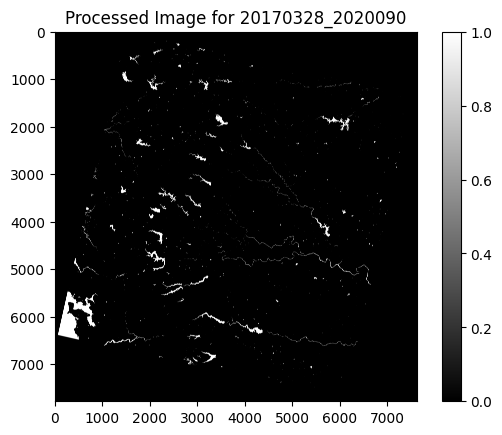

Results for D:\DatasetUSGS\2017\20170328\LC08_L2SP_147047_20170328_20200904_02_T1_MTL.txt:
20170328_2020090: 
Water Area: 851368500.0 square meters
Land Area: 52587761400.0 square meters
Water Area: 85136.85 Hectare
Land Area: 5258776.14 Hectare
Water Percentage: 1.5931556176029729 %
Land Percentage: 98.40684438239703 %
--------------------------------------------------


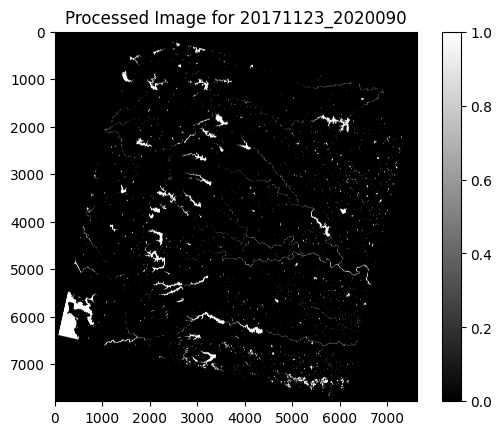

Results for D:\DatasetUSGS\2017\20171123\LC08_L2SP_147047_20171123_20200902_02_T1_MTL.txt:
20171123_2020090: 
Water Area: 1369697400.0 square meters
Land Area: 52069432500.0 square meters
Water Area: 136969.74 Hectare
Land Area: 5206943.25 Hectare
Water Percentage: 2.563098243858196 %
Land Percentage: 97.43690175614181 %
--------------------------------------------------


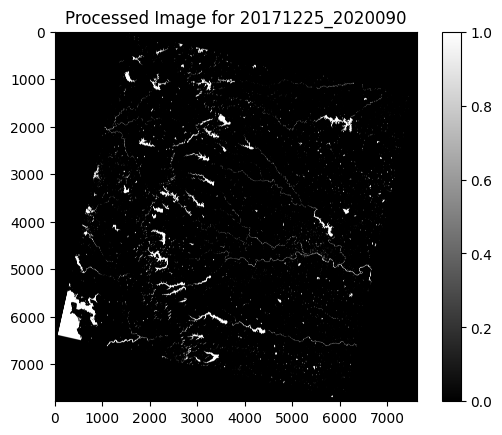

Results for D:\DatasetUSGS\2017\20171225\LC08_L2SP_147047_20171225_20200902_02_T1_MTL.txt:
20171225_2020090: 
Water Area: 1361017800.0 square meters
Land Area: 52078112100.0 square meters
Water Area: 136101.78 Hectare
Land Area: 5207811.21 Hectare
Water Percentage: 2.5468562129414463 %
Land Percentage: 97.45314378705855 %
--------------------------------------------------


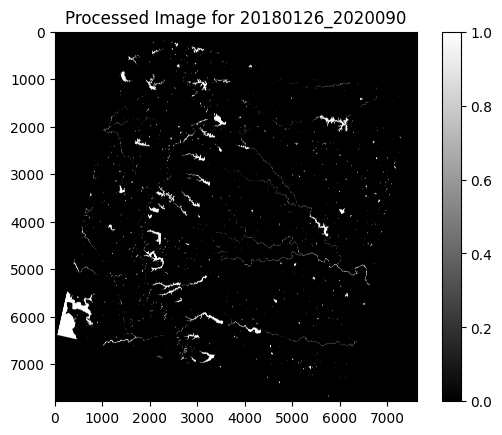

Results for D:\DatasetUSGS\2018\20180126\LC08_L2SP_147047_20180126_20200902_02_T1_MTL.txt:
20180126_2020090: 
Water Area: 1063218600.0 square meters
Land Area: 52375911300.0 square meters
Water Area: 106321.86 Hectare
Land Area: 5237591.13 Hectare
Water Percentage: 1.9895881575721541 %
Land Percentage: 98.01041184242784 %
--------------------------------------------------


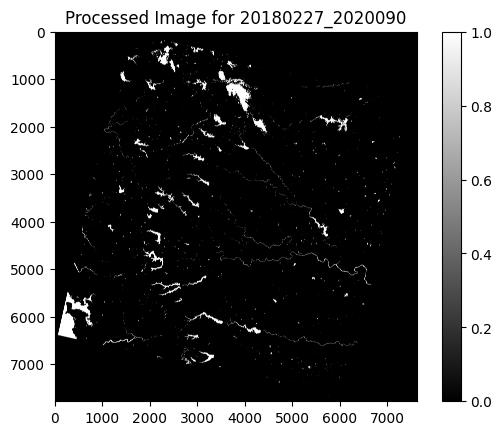

Results for D:\DatasetUSGS\2018\20180227\LC08_L2SP_147047_20180227_20200902_02_T1_MTL.txt:
20180227_2020090: 
Water Area: 1226209500.0 square meters
Land Area: 52212920400.0 square meters
Water Area: 122620.95 Hectare
Land Area: 5221292.04 Hectare
Water Percentage: 2.294591065188732 %
Land Percentage: 97.70540893481126 %
--------------------------------------------------


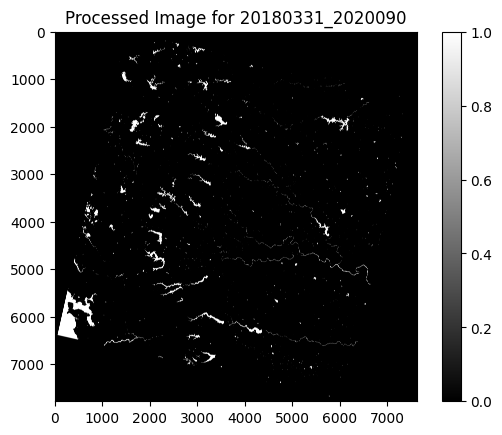

Results for D:\DatasetUSGS\2018\20180331\LC08_L2SP_147047_20180331_20200901_02_T1_MTL.txt:
20180331_2020090: 
Water Area: 952211700.0 square meters
Land Area: 52486918200.0 square meters
Water Area: 95221.17 Hectare
Land Area: 5248691.82 Hectare
Water Percentage: 1.781862282903674 %
Land Percentage: 98.21813771709633 %
--------------------------------------------------


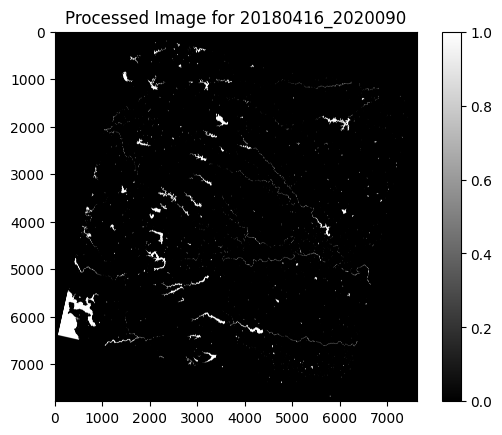

Results for D:\DatasetUSGS\2018\20180416\LC08_L2SP_147047_20180416_20200901_02_T1_MTL.txt:
20180416_2020090: 
Water Area: 896310000.0 square meters
Land Area: 52542819900.0 square meters
Water Area: 89631.0 Hectare
Land Area: 5254281.99 Hectare
Water Percentage: 1.6772541051421574 %
Land Percentage: 98.32274589485785 %
--------------------------------------------------


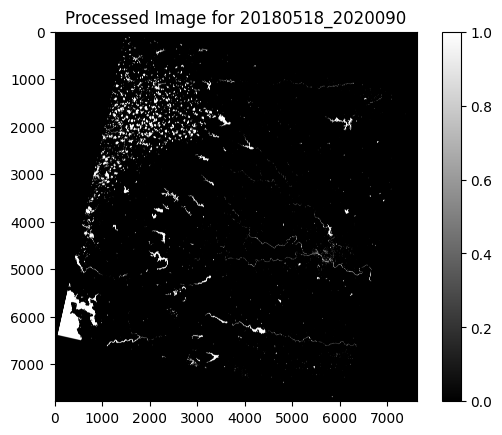

Results for D:\DatasetUSGS\2018\20180518\LC08_L2SP_147047_20180518_20200901_02_T1_MTL.txt:
20180518_2020090: 
Water Area: 1329726600.0 square meters
Land Area: 52109403300.0 square meters
Water Area: 132972.66 Hectare
Land Area: 5210940.33 Hectare
Water Percentage: 2.488301367346926 %
Land Percentage: 97.51169863265308 %
--------------------------------------------------


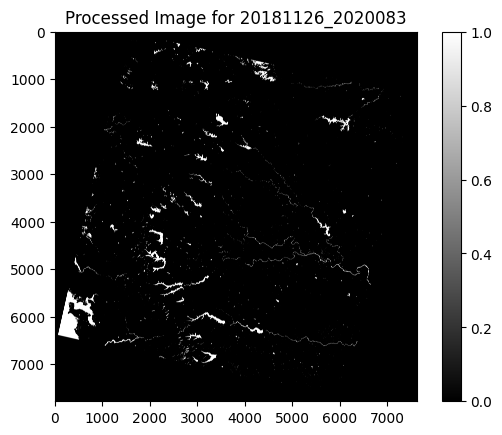

Results for D:\DatasetUSGS\2018\20181126\LC08_L2SP_147047_20181126_20200830_02_T1_MTL.txt:
20181126_2020083: 
Water Area: 998640900.0 square meters
Land Area: 52440489000.0 square meters
Water Area: 99864.09 Hectare
Land Area: 5244048.9 Hectare
Water Percentage: 1.868744685530518 %
Land Percentage: 98.13125531446948 %
--------------------------------------------------


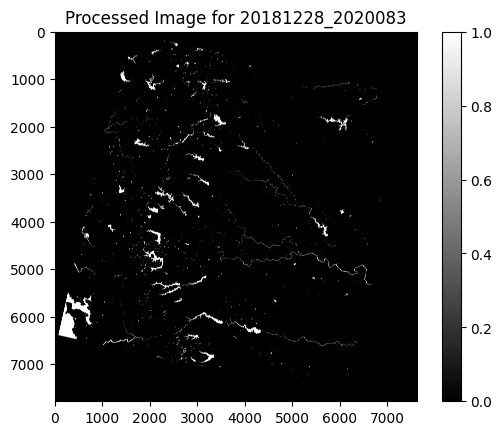

Results for D:\DatasetUSGS\2018\20181228\LC08_L2SP_147047_20181228_20200830_02_T1_MTL.txt:
20181228_2020083: 
Water Area: 923801400.0 square meters
Land Area: 52515328500.0 square meters
Water Area: 92380.14 Hectare
Land Area: 5251532.85 Hectare
Water Percentage: 1.7286984307729156 %
Land Percentage: 98.27130156922709 %
--------------------------------------------------


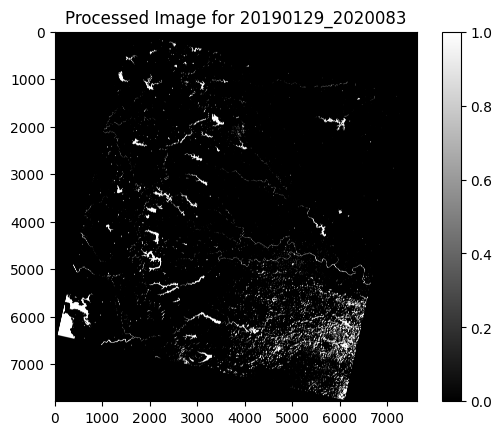

Results for D:\DatasetUSGS\2019\20190129\LC08_L2SP_147047_20190129_20200830_02_T1_MTL.txt:
20190129_2020083: 
Water Area: 1510974000.0 square meters
Land Area: 51928155900.0 square meters
Water Area: 151097.4 Hectare
Land Area: 5192815.59 Hectare
Water Percentage: 2.8274674434772185 %
Land Percentage: 97.17253255652278 %
--------------------------------------------------


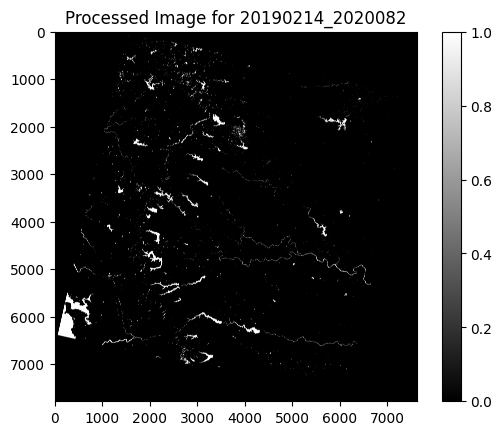

Results for D:\DatasetUSGS\2019\20190214\LC08_L2SP_147047_20190214_20200829_02_T1_MTL.txt:
20190214_2020082: 
Water Area: 880310700.0 square meters
Land Area: 52558819200.0 square meters
Water Area: 88031.07 Hectare
Land Area: 5255881.92 Hectare
Water Percentage: 1.6473148077959257 %
Land Percentage: 98.35268519220406 %
--------------------------------------------------


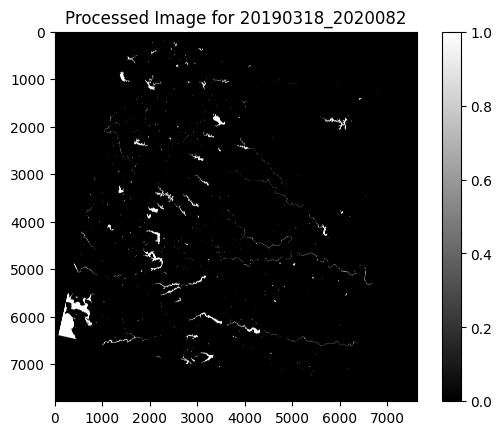

Results for D:\DatasetUSGS\2019\20190318\LC08_L2SP_147047_20190318_20200829_02_T1_MTL.txt:
20190318_2020082: 
Water Area: 717586200.0 square meters
Land Area: 52721543700.0 square meters
Water Area: 71758.62 Hectare
Land Area: 5272154.37 Hectare
Water Percentage: 1.3428104112900237 %
Land Percentage: 98.65718958870998 %
--------------------------------------------------


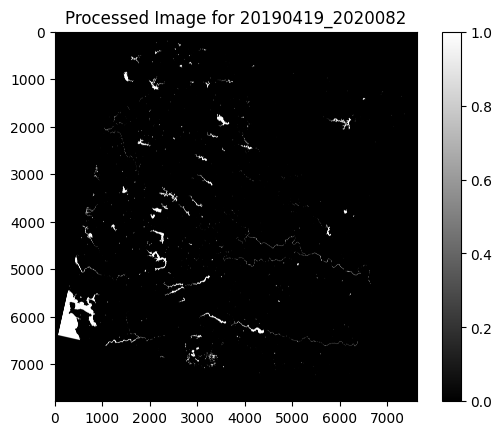

Results for D:\DatasetUSGS\2019\20190419\LC08_L2SP_147047_20190419_20200828_02_T1_MTL.txt:
20190419_2020082: 
Water Area: 744350400.0 square meters
Land Area: 52694779500.0 square meters
Water Area: 74435.04 Hectare
Land Area: 5269477.95 Hectare
Water Percentage: 1.3928939363213697 %
Land Percentage: 98.60710606367863 %
--------------------------------------------------


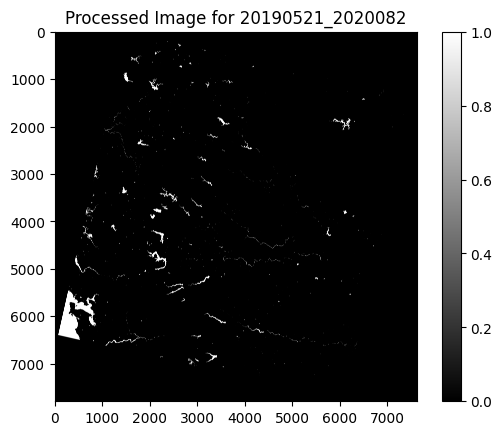

Results for D:\DatasetUSGS\2019\20190521\LC08_L2SP_147047_20190521_20200828_02_T1_MTL.txt:
20190521_2020082: 
Water Area: 629012700.0 square meters
Land Area: 52948915200.0 square meters
Water Area: 62901.27 Hectare
Land Area: 5294891.52 Hectare
Water Percentage: 1.1740146076085933 %
Land Percentage: 98.8259853923914 %
--------------------------------------------------


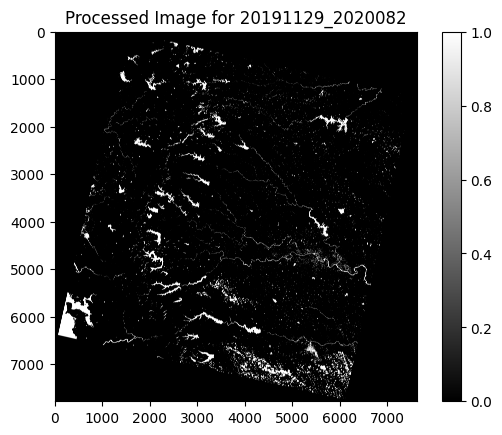

Results for D:\DatasetUSGS\2019\20191129\LC08_L2SP_147047_20191129_20200825_02_T1_MTL.txt:
20191129_2020082: 
Water Area: 1771963200.0 square meters
Land Area: 51667166700.0 square meters
Water Area: 177196.32 Hectare
Land Area: 5166716.67 Hectare
Water Percentage: 3.3158533892970437 %
Land Percentage: 96.68414661070295 %
--------------------------------------------------


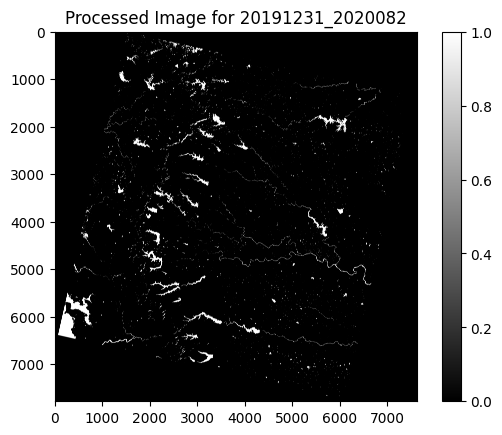

Results for D:\DatasetUSGS\2019\20191231\LC08_L2SP_147047_20191231_20200824_02_T1_MTL.txt:
20191231_2020082: 
Water Area: 1193689800.0 square meters
Land Area: 52245440100.0 square meters
Water Area: 119368.98 Hectare
Land Area: 5224544.01 Hectare
Water Percentage: 2.2337373423439666 %
Land Percentage: 97.76626265765603 %
--------------------------------------------------


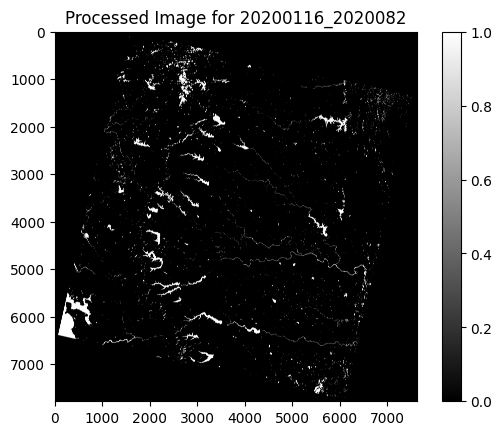

Results for D:\DatasetUSGS\2020\20200116\LC08_L2SP_147047_20200116_20200823_02_T1_MTL.txt:
20200116_2020082: 
Water Area: 1321272900.0 square meters
Land Area: 52117857000.0 square meters
Water Area: 132127.29 Hectare
Land Area: 5211785.7 Hectare
Water Percentage: 2.4724820603787565 %
Land Percentage: 97.52751793962125 %
--------------------------------------------------


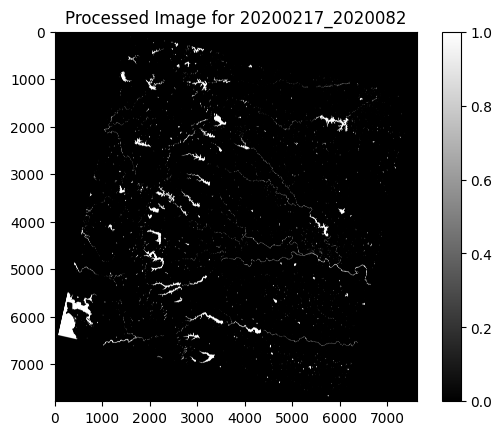

Results for D:\DatasetUSGS\2020\20200217\LC08_L2SP_147047_20200217_20200823_02_T1_MTL.txt:
20200217_2020082: 
Water Area: 1075707000.0 square meters
Land Area: 52363422900.0 square meters
Water Area: 107570.7 Hectare
Land Area: 5236342.29 Hectare
Water Percentage: 2.0129575500442423 %
Land Percentage: 97.98704244995577 %
--------------------------------------------------


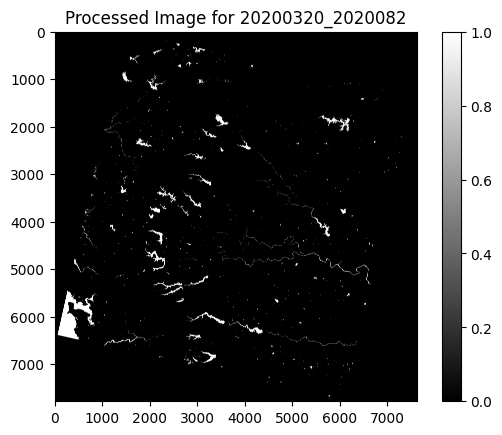

Results for D:\DatasetUSGS\2020\20200320\LC08_L2SP_147047_20200320_20200822_02_T1_MTL.txt:
20200320_2020082: 
Water Area: 925247700.0 square meters
Land Area: 52513882200.0 square meters
Water Area: 92524.77 Hectare
Land Area: 5251388.22 Hectare
Water Percentage: 1.7314048745393213 %
Land Percentage: 98.26859512546068 %
--------------------------------------------------


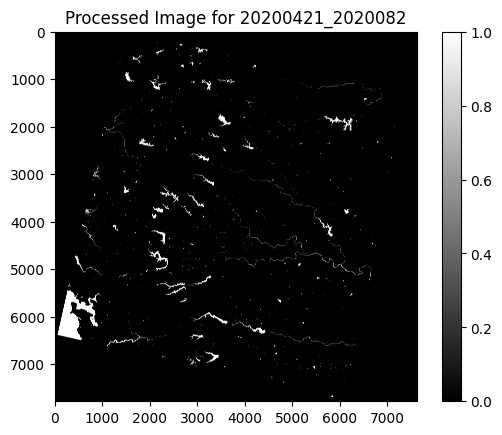

Results for D:\DatasetUSGS\2020\20200421\LC08_L2SP_147047_20200421_20200822_02_T1_MTL.txt:
20200421_2020082: 
Water Area: 963237600.0 square meters
Land Area: 52475892300.0 square meters
Water Area: 96323.76 Hectare
Land Area: 5247589.23 Hectare
Water Percentage: 1.8024949167445186 %
Land Percentage: 98.19750508325548 %
--------------------------------------------------


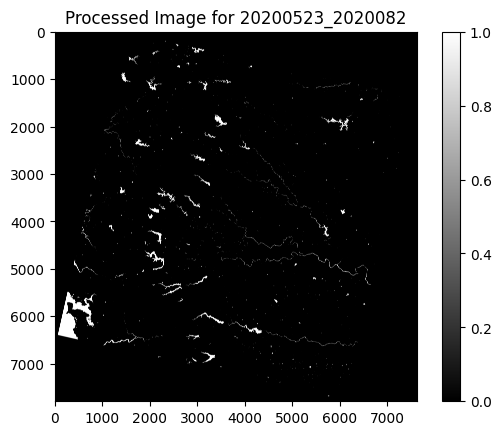

Results for D:\DatasetUSGS\2020\20200523\LC08_L2SP_147047_20200523_20200820_02_T1_MTL.txt:
20200523_2020082: 
Water Area: 755202600.0 square meters
Land Area: 52752606300.0 square meters
Water Area: 75520.26 Hectare
Land Area: 5275260.63 Hectare
Water Percentage: 1.4113876376649763 %
Land Percentage: 98.58861236233503 %
--------------------------------------------------


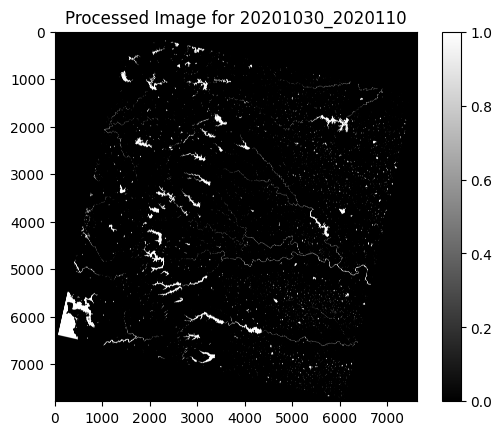

Results for D:\DatasetUSGS\2020\20201030\LC08_L2SP_147047_20201030_20201106_02_T1_MTL.txt:
20201030_2020110: 
Water Area: 1310182200.0 square meters
Land Area: 52128947700.0 square meters
Water Area: 131018.22 Hectare
Land Area: 5212894.77 Hectare
Water Percentage: 2.4517281670785587 %
Land Percentage: 97.54827183292144 %
--------------------------------------------------


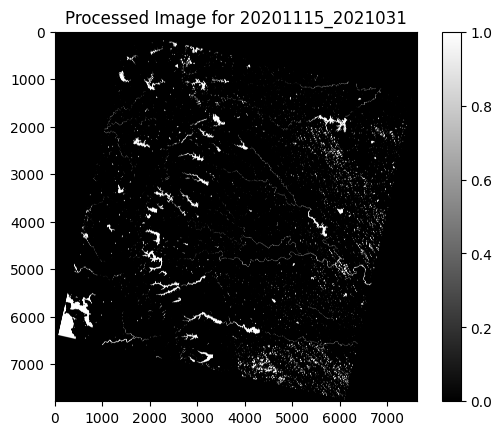

Results for D:\DatasetUSGS\2020\20201115\LC08_L2SP_147047_20201115_20210315_02_T1_MTL.txt:
20201115_2021031: 
Water Area: 1558963800.0 square meters
Land Area: 51880166100.0 square meters
Water Area: 155896.38 Hectare
Land Area: 5188016.61 Hectare
Water Percentage: 2.9172701780834944 %
Land Percentage: 97.0827298219165 %
--------------------------------------------------


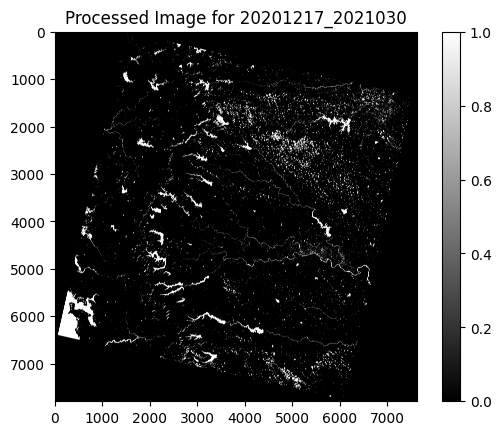

Results for D:\DatasetUSGS\2020\20201217\LC08_L2SP_147047_20201217_20210309_02_T1_MTL.txt:
20201217_2021030: 
Water Area: 2116853100.0 square meters
Land Area: 51390955800.0 square meters
Water Area: 211685.31 Hectare
Land Area: 5139095.58 Hectare
Water Percentage: 3.956157322674448 %
Land Percentage: 96.04384267732556 %
--------------------------------------------------


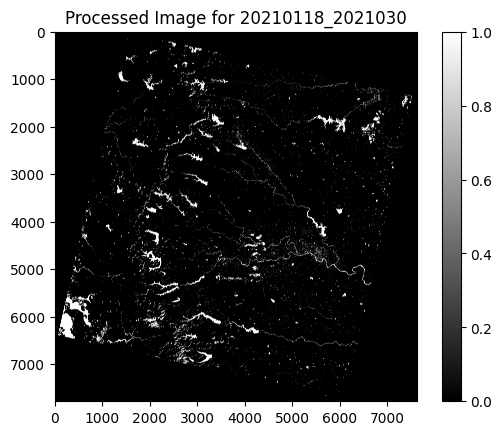

Results for D:\DatasetUSGS\2021\20210118\LC08_L2SP_147047_20210118_20210306_02_T1_MTL.txt:
20210118_2021030: 
Water Area: 1647185400.0 square meters
Land Area: 51791944500.0 square meters
Water Area: 164718.54 Hectare
Land Area: 5179194.45 Hectare
Water Percentage: 3.08235819535677 %
Land Percentage: 96.91764180464322 %
--------------------------------------------------


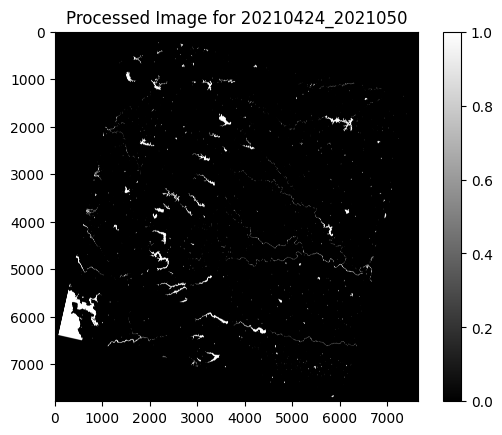

Results for D:\DatasetUSGS\2021\20210424\LC08_L2SP_147047_20210424_20210501_02_T1_MTL.txt:
20210424_2021050: 
Water Area: 917853300.0 square meters
Land Area: 52591305600.0 square meters
Water Area: 91785.33 Hectare
Land Area: 5259130.56 Hectare
Water Percentage: 1.7153199916958517 %
Land Percentage: 98.28468000830415 %
--------------------------------------------------


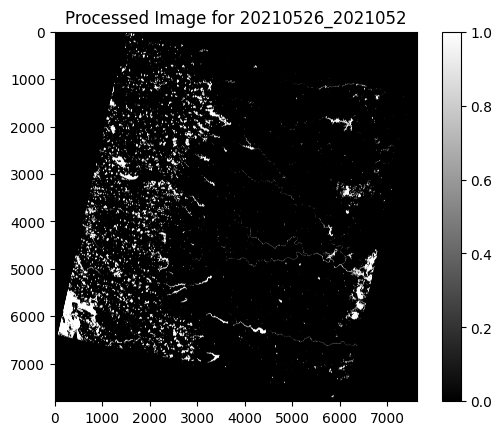

Results for D:\DatasetUSGS\2021\20210526\LC08_L2SP_147047_20210526_20210529_02_T1_MTL.txt:
20210526_2021052: 
Water Area: 2137941900.0 square meters
Land Area: 51439986000.0 square meters
Water Area: 213794.19 Hectare
Land Area: 5143998.6 Hectare
Water Percentage: 3.9903407686656727 %
Land Percentage: 96.00965923133433 %
--------------------------------------------------


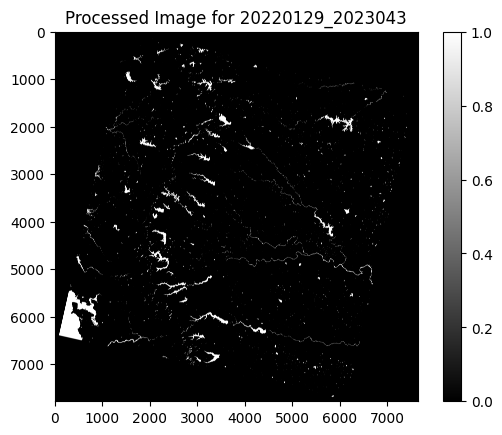

Results for D:\DatasetUSGS\2022\20220129\LC09_L2SP_147047_20220129_20230430_02_T1_MTL.txt:
20220129_2023043: 
Water Area: 1168595100.0 square meters
Land Area: 52340563800.0 square meters
Water Area: 116859.51 Hectare
Land Area: 5234056.38 Hectare
Water Percentage: 2.1839160323635736 %
Land Percentage: 97.81608396763643 %
--------------------------------------------------


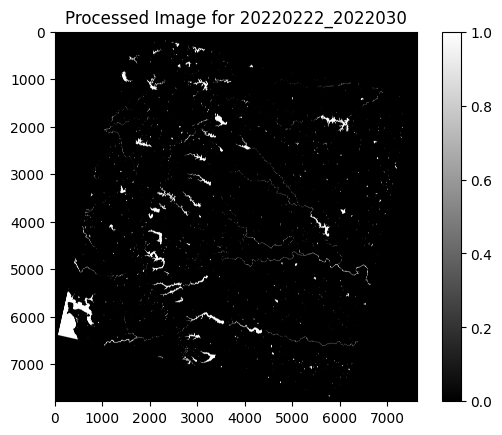

Results for D:\DatasetUSGS\2022\20220222\LC08_L2SP_147047_20220222_20220301_02_T1_MTL.txt:
20220222_2022030: 
Water Area: 1029703500.0 square meters
Land Area: 52409426400.0 square meters
Water Area: 102970.35 Hectare
Land Area: 5240942.64 Hectare
Water Percentage: 1.926871754698985 %
Land Percentage: 98.073128245301 %
--------------------------------------------------


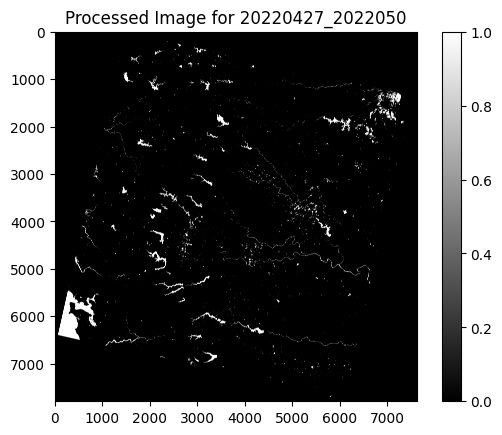

Results for D:\DatasetUSGS\2022\20220427\LC08_L2SP_147047_20220427_20220503_02_T1_MTL.txt:
20220427_2022050: 
Water Area: 1064678400.0 square meters
Land Area: 52513249500.0 square meters
Water Area: 106467.84 Hectare
Land Area: 5251324.95 Hectare
Water Percentage: 1.9871585963293663 %
Land Percentage: 98.01284140367063 %
--------------------------------------------------


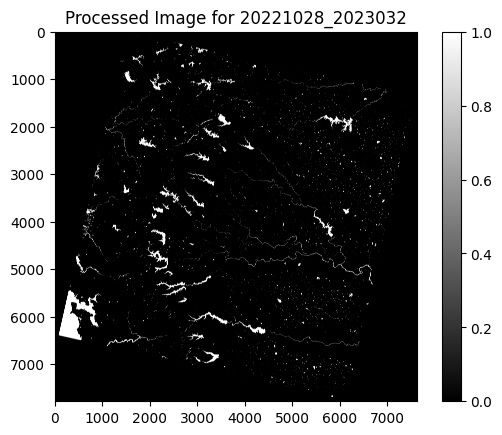

Results for D:\DatasetUSGS\2022\20221028\LC09_L2SP_147047_20221028_20230324_02_T1_MTL.txt:
20221028_2023032: 
Water Area: 1384965900.0 square meters
Land Area: 52054164000.0 square meters
Water Area: 138496.59 Hectare
Land Area: 5205416.4 Hectare
Water Percentage: 2.5916700039683844 %
Land Percentage: 97.40832999603161 %
--------------------------------------------------


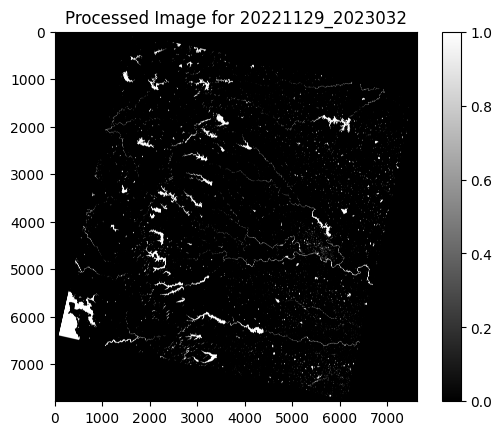

Results for D:\DatasetUSGS\2022\20221129\LC09_L2SP_147047_20221129_20230320_02_T1_MTL.txt:
20221129_2023032: 
Water Area: 1373319900.0 square meters
Land Area: 52065810000.0 square meters
Water Area: 137331.99 Hectare
Land Area: 5206581.0 Hectare
Water Percentage: 2.569876984467893 %
Land Percentage: 97.4301230155321 %
--------------------------------------------------


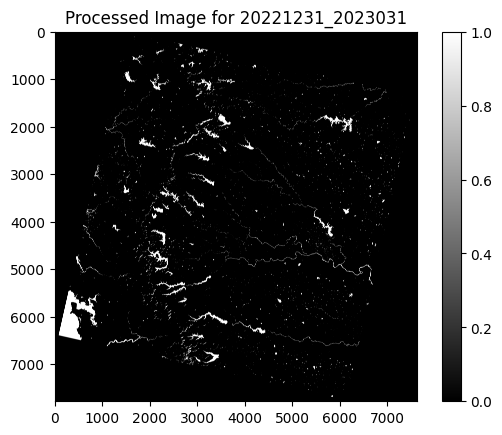

Results for D:\DatasetUSGS\2022\20221231\LC09_L2SP_147047_20221231_20230315_02_T1_MTL.txt:
20221231_2023031: 
Water Area: 1301699700.0 square meters
Land Area: 52137430200.0 square meters
Water Area: 130169.97 Hectare
Land Area: 5213743.02 Hectare
Water Percentage: 2.4358549670173426 %
Land Percentage: 97.56414503298265 %
--------------------------------------------------


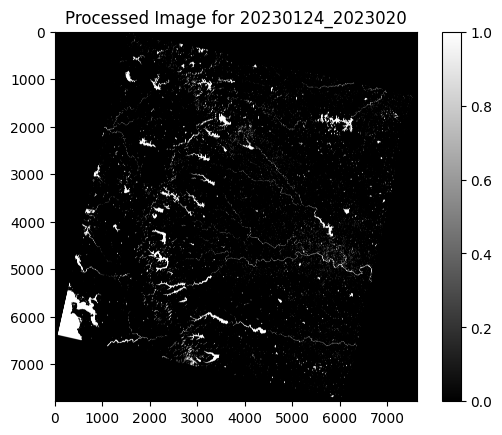

Results for D:\DatasetUSGS\2023\20230124\LC08_L2SP_147047_20230124_20230207_02_T1_MTL.txt:
20230124_2023020: 
Water Area: 1607050800.0 square meters
Land Area: 51832079100.0 square meters
Water Area: 160705.08 Hectare
Land Area: 5183207.91 Hectare
Water Percentage: 3.007254801878801 %
Land Percentage: 96.9927451981212 %
--------------------------------------------------


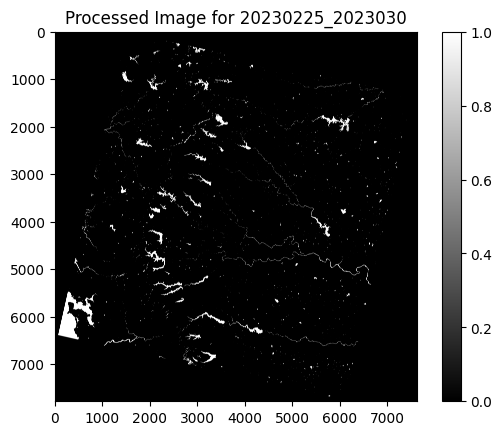

Results for D:\DatasetUSGS\2023\20230225\LC08_L2SP_147047_20230225_20230301_02_T1_MTL.txt:
20230225_2023030: 
Water Area: 1044151200.0 square meters
Land Area: 52394978700.0 square meters
Water Area: 104415.12 Hectare
Land Area: 5239497.87 Hectare
Water Percentage: 1.9539075616573616 %
Land Percentage: 98.04609243834264 %
--------------------------------------------------


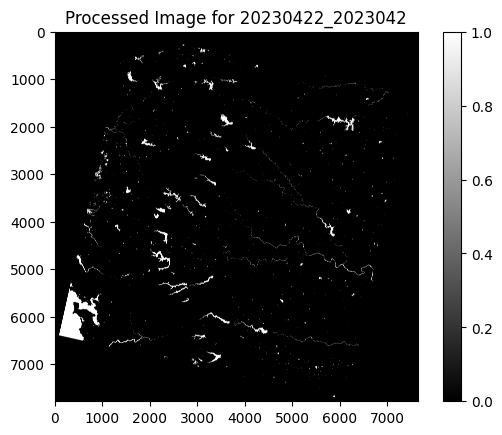

Results for D:\DatasetUSGS\2023\20230422\LC09_L2SP_147047_20230422_20230424_02_T1_MTL.txt:
20230422_2023042: 
Water Area: 987174000.0 square meters
Land Area: 52521984900.0 square meters
Water Area: 98717.4 Hectare
Land Area: 5252198.49 Hectare
Water Percentage: 1.8448692154643453 %
Land Percentage: 98.15513078453564 %
--------------------------------------------------


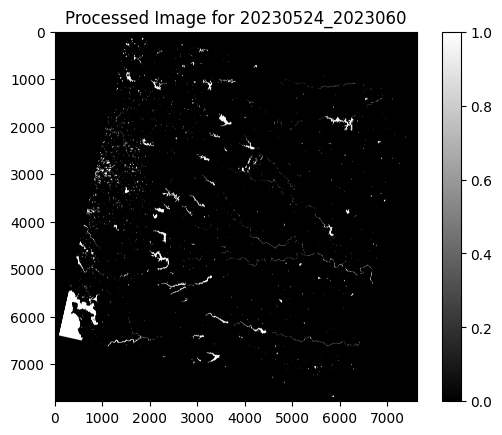

Results for D:\DatasetUSGS\2023\20230524\LC09_L2SP_147047_20230524_20230601_02_T1_MTL.txt:
20230524_2023060: 
Water Area: 964436400.0 square meters
Land Area: 52474693500.0 square meters
Water Area: 96443.64 Hectare
Land Area: 5247469.35 Hectare
Water Percentage: 1.8047382167425594 %
Land Percentage: 98.19526178325744 %
--------------------------------------------------


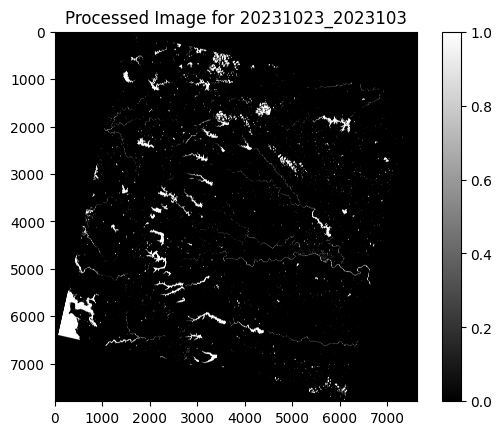

Results for D:\DatasetUSGS\2023\20231023\LC08_L2SP_147047_20231023_20231031_02_T1_MTL.txt:
20231023_2023103: 
Water Area: 1471460400.0 square meters
Land Area: 52106467500.0 square meters
Water Area: 147146.04 Hectare
Land Area: 5210646.75 Hectare
Water Percentage: 2.7463928854180266 %
Land Percentage: 97.25360711458197 %
--------------------------------------------------


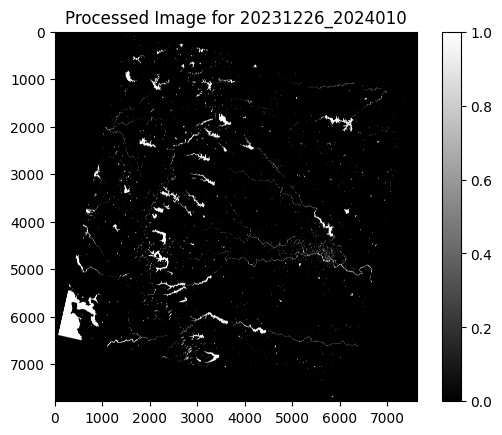

Results for D:\DatasetUSGS\2023\20231226\LC08_L2SP_147047_20231226_20240104_02_T1_MTL.txt:
20231226_2024010: 
Water Area: 1301865300.0 square meters
Land Area: 52137264600.0 square meters
Water Area: 130186.53 Hectare
Land Area: 5213726.46 Hectare
Water Percentage: 2.4361648523023574 %
Land Percentage: 97.56383514769765 %
--------------------------------------------------

Done Processing


Average of Result: 

Avg Water for Year 2014 in %
2.26507512094746
Avg Land for Year 2014 in %
97.73492487905254
Avg Water for Year 2014 in Hectare
120933.77142857145
Avg Land for Year 2014 in Hectare
5217035.875714286
Avg Water for Year 2015 in %
2.0890985759462932
Avg Land for Year 2015 in %
97.91090142405369
Avg Water for Year 2015 in Hectare
111708.495
Avg Land for Year 2015 in Hectare
5235660.945
Avg Water for Year 2016 in %
2.278706553449624
Avg Land for Year 2016 in %
97.72129344655038
Avg Water for Year 2016 in Hectare
121861.39499999997
Avg Land for Year 2016 in Hectare
5225508.045000001
Av

In [31]:
obj.process_and_show_images_for_whole_dataset()

In [55]:
algorithmsmenu()

Starting

1.Linear Regression
2.Polynomial Regression (Degree 1)
3.Polynomial Regression (Degree 2)
4.Polynomial Regression (Degree 3)
5.Polynomial Regression (Degree 4)
6.Random Forest
7.Gradient Boosting
8.Support Vector Machine
9.K-Nearest Neighbors
10.XGBoost
11.Neural Network
100.Exit
Choice:  99

Applying Linear Regression

Applying Polynomial Regression (Degree 1)

Applying Polynomial Regression (Degree 2)

Applying Polynomial Regression (Degree 3)

Applying Polynomial Regression (Degree 4)

Applying Random Forest

Applying Gradient Boosting

Applying Support Vector Machine

Applying K-Nearest Neighbors

Applying XGBoost

Linear Regression - MSE: 404069822.11033124, RMSE: 20101.488057114857, R²: 0.7504380065885861
Future predictions for water_area with Linear Regression: 1310105574.7 square meters, 1314051051.8 square meters, 1318311748.4 square meters
Future predictions for water_area with Linear Regression: 131010.6 hectares, 131405.1 hectares, 131831.2 hectares
--------------

In [ ]:
print(obj.X_train)
print(obj.y_train)

In [ ]:
#Method for finding hyperparameters
from sklearn.model_selection import GridSearchCV
paras = {'n_estimators':range(1,18),
          'max_depth': range(1,18),
          'min_samples_split': range(1,18),
          'min_samples_leaf': range(1,18)}
rf = GradientBoostingRegressor(random_state=42)
grid = GridSearchCV(estimator = rf, param_grid = paras,cv=4,verbose=3)

In [ ]:
grid.fit(obj.X_train,obj.y_train)

In [ ]:
grid.best_score_
grid.best_params_